# K-Nearest Neighbors (KNN) ile Meme Kanseri Sınıflandırması


## Gerekli Kütüphanelerin İçe Aktarılması

In [1]:
# Veri seti ve temel kütüphaneler
from sklearn.datasets import load_breast_cancer
import pandas as pd
# Model ve değerlendirme metrikleri
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Görselleştirme
import matplotlib.pyplot as plt

1-veri seti incelemesi  
2-modelin train edilmesi  
3-sonuçların değerlendirilmesi  
4-hiperparametre ayarlaması

## 1-Veri Setinin İncelenmesi

-Breast Cancer Wisconsin veri seti, meme kanseri teşhisi için kullanılan 569 örnekten ve 30 özellikten oluşan bir veri setidir.  
-Target değişkeni: 0 = malign (kötü huylu), 1 = benign (iyi huylu)

In [2]:
cancer=load_breast_cancer()

In [3]:
#Veri setini DataFrame'e dönüştürme
df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df["target"]=cancer.target

In [4]:
#İlk 5 satırı görüntüleme
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.isnull().sum() #eksik değer kontrolü

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## 2-Modelin Train Edilmesi

In [6]:
#Özellikler ve hedef değişken ayrımı
X=cancer.data
y=cancer.target

In [7]:
#Veri setini train ve test olarak bölme (%70 train, %30 test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3, 
    random_state=42
)

### Veri Ölçeklendirme (Standardization)
-KNN algoritması mesafe tabanlı çalıştığı için özelliklerin aynı ölçekte olması önemlidir.  
-StandardScaler: her özelliği ortalama=0, standart sapma=1 olacak şekilde ölçeklendirir.

In [8]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train) #Train verisi üzerinde fit ve transform
X_test= scaler.transform(X_test) #Test verisi sadece transform edilir

In [9]:
knn=KNeighborsClassifier(n_neighbors=3) #En yakın 3komşuya bakarak karar verir
knn.fit(X_train,y_train) 

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
#Test verisi üzerinde tahmin yapma
y_pred= knn.predict(X_test) 

In [11]:
#Doğruluk skoru hesaplama
accuracy= accuracy_score(y_test, y_pred)
print("Dogruluk", accuracy)

Dogruluk 0.9590643274853801


### Confusion Matrix (Karmaşıklık Matrisi)
-Modelin hangi sınıfları ne kadar doğru tahmin ettiğini gösterir.  
Matris formatı:  
[[True Negative, False Positive],  
[False Negative, True Positive]]


In [12]:
conf=confusion_matrix(y_test, y_pred)
conf

array([[ 59,   4],
       [  3, 105]])

## 4-Hiperparametre Ayarlaması  
-Farklı k değerleri için modelin performansını test ediyoruz.  
-En iyi k değerini bulmak için doğruluk skorlarını karşılaştıracağız. (grafikle kolaylıkla seçebiliriz)

In [13]:
accuracy_values= []
k_values= []

#1'den 20'ye kadar her k değeri için model eğit ve test et
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

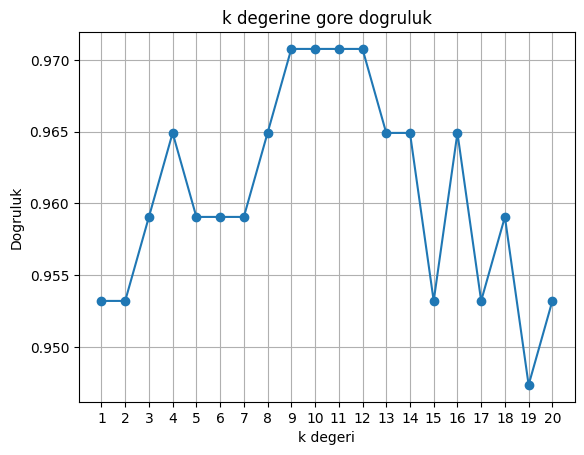

In [14]:
#Sonuçların Görselleştirilmesi
plt.figure()
plt.plot(k_values, accuracy_values, marker="o", linestyle="-")
plt.title("k degerine gore dogruluk")
plt.xlabel("k degeri")
plt.ylabel("Dogruluk")
plt.xticks(k_values)
plt.grid(True)


In [15]:
knn=KNeighborsClassifier(n_neighbors=10) #En yakın 3komşuya bakarak karar verir
knn.fit(X_train,y_train) 
#Test verisi üzerinde tahmin yapma
y_pred= knn.predict(X_test) 
#Doğruluk skoru hesaplama
accuracy= accuracy_score(y_test, y_pred)
print("Dogruluk", accuracy)

Dogruluk 0.9707602339181286
